# Introduction

This is a short tutorial on Bayesian Networks in R with a special emphasis on using them for quantitative/probabilistic causal AOP Bayesian Network analysis.

First off, we need to install 1 package, and then load the two libraries we need to use. Installing packages on Google Colab (and frankly any cloud resource) can be a huge pain. The length of time required depends on many factors we can't control. For instance, how much compute power is Google going to give us, and how many packages does the one we're installing depend upon?

So let's install that package now.

In [6]:
# gRain is the package that does all of the Bayesian network heavy lifting
install.packages("gRain")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Now that we have that installed, we're going to load up the gRain and data.table libraries.

In [7]:
library(gRain)
library(data.table)

Loading required package: gRbase



Next, we're going to build this Bayes Net.

In [8]:
#Building the Bayes Net
yn <- c("yes", "no")
cholesterol <- cptable(~ cholesterol, values=c(0.95, 0.05), levels=yn)
cyp11a1 <- cptable(~ cyp11a1, values=c(0.50, 0.50), levels=yn)
pregnenolone <- cptable(~ pregnenolone | cyp11a1+cholesterol, values=c(0.99, 0.01, 0.01, 0.01,
                                                                       0.01, 0.99, 0.99, 0.99), levels=yn)
cyp17a1_hydroxylase <- cptable(~ cyp17a1_hydroxylase, values=c(0.50, 0.50), levels=yn)
cyp17a1_lyase <- cptable(~ cyp17a1_lyase, values=c(.50, 0.50), levels=yn)
hsd3b1 <- cptable(~ hsd3b1, values=c(0.50, 0.50), levels=yn)
hsd17b3 <- cptable(~ hsd17b3, values=c(0.50, 0.50), levels=yn)
cyp19a1 <- cptable(~ cyp19a1, values=c(0.50, 0.50), levels=yn)
cyp21a1 <- cptable(~ cyp21a1, values=c(0.50, 0.50), levels=yn)
cyp11b1 <- cptable(~ cyp11b1, values=c(0.50, 0.50), levels=yn)
hydroxypregnenolone <- cptable(~ hydroxypregnenolone | cyp17a1_hydroxylase+pregnenolone,
                               values=c(0.99, 0.01, 0.01, 0.99,
                                        0.01, 0.99, 0.01, 0.99),
                               levels=yn)
dhea <- cptable(~ dhea | cyp17a1_lyase+hydroxypregnenolone,
                values = c(0.99, 0.01, 0.01, 0.99,
                           0.01, 0.99, 0.01, 0.99),
                levels=yn)
progesterone <- cptable(~ progesterone | hsd3b1+pregnenolone,
                        values = c(0.99, 0.01, 0.01, 0.99,
                                   0.01, 0.99, 0.01, 0.99),
                        levels=yn)
hydroxyprogesterone <- cptable(~hydroxyprogesterone | cyp17a1_hydroxylase+progesterone,
                               values = c(0.99, 0.01, 0.01, 0.99,
                                          0.01, 0.99, 0.01, 0.99),
                               levels=yn)
# androsteinedione <- cptable(~ androsteinedione | hsd3b1+dhea+cyp17a1_lyase+hydroxyprogesterone,
#                             values = c(0.99, 0.50, 0.50, 0.50, 0.50, 0.01, 0.01, 0.01, 0.50, 0.01, 0.01, 0.01, 0.50, 0.01, 0.01, 0.01,
#                                        0.01, 0.50, 0.50, 0.50, 0.50, 0.99, 0.99, 0.99, 0.50, 0.99, 0.99, 0.99, 0.50, 0.99, 0.99, 0.99),
#                             levels=yn)
androsteinedione1 <- cptable(~ androsteinedione1 | hsd3b1+dhea,
                            values = c(0.99, 0.01, 0.01, 0.99,
                                       0.01, 0.99, 0.01, 0.99),
                            levels=yn)
androsteinedione2 <- cptable(~ androsteinedione2 | cyp17a1_lyase+hydroxyprogesterone,
                             values = c(0.99, 0.01, 0.01, 0.99,
                                        0.01, 0.99, 0.01, 0.99),
                             levels=yn)
androsteinedione <- cptable(~ androsteinedione | androsteinedione1+androsteinedione2,
                            values = c(0.99, 0.01, 0.99, 0.01,
                                       0.99, 0.01, 0.01, 0.99),
                            levels=yn)
estrone <- cptable(~ estrone | cyp19a1+androsteinedione,
                   values = c(0.99, 0.01, 0.01, 0.99,
                              0.01, 0.99, 0.01, 0.99),
                   levels=yn)
testosterone <- cptable(~ testosterone | hsd17b3+androsteinedione,
                        values=c(0.99, 0.01, 0.01, 0.99,
                                 0.01, 0.99, 0.01, 0.99),
                        levels=yn)
estradiol <- cptable(~ estradiol | cyp19a1+testosterone,
                     values=c(0.99, 0.01, 0.01, 0.99,
                              0.01, 0.99, 0.01, 0.99),
                     levels=yn)
deoxycortisone <- cptable(~ deoxycortisone | cyp21a1+progesterone,
                          values=c(0.99, 0.01, 0.01, 0.99,
                                   0.01, 0.99, 0.01, 0.99),
                          levels=yn)
corticosterone <- cptable(~ corticosterone | cyp11b1+deoxycortisone,
                          values=c(0.99, 0.01, 0.01, 0.99,
                                   0.01, 0.99, 0.01, 0.99),
                          levels=yn)
deoxycortisol <- cptable(~ deoxycortisol | cyp21a1+hydroxyprogesterone,
                         values=c(0.99, 0.01, 0.01, 0.99,
                                  0.01, 0.99, 0.01, 0.99),
                         levels=yn)
cortisol <- cptable(~ cortisol | cyp11b1+deoxycortisol,
                    values=c(0.99, 0.01, 0.01, 0.99,
                             0.01, 0.99, 0.01, 0.99),
                    levels=yn)


plist <- compileCPT(list(cholesterol, cyp11a1, pregnenolone, cyp17a1_hydroxylase, cyp17a1_lyase, cyp21a1, cyp11b1, hsd3b1, hsd17b3, cyp19a1, hydroxypregnenolone,
                         dhea, progesterone, hydroxyprogesterone, androsteinedione1, androsteinedione2, androsteinedione, estrone, testosterone, estradiol,
                         deoxycortisone, corticosterone, deoxycortisol, cortisol))

bn_test <- grain(plist)

Above -- that's a lot of code. In gRain,the way we build the Bayes Net is to build out the Conditional Probability Tables (cptable).

We then compile the CPTs into an object called plist.

Then we run the grain command on plist to create the BayesNet object.

Next, we're going to look at it to make sure it makes sense.

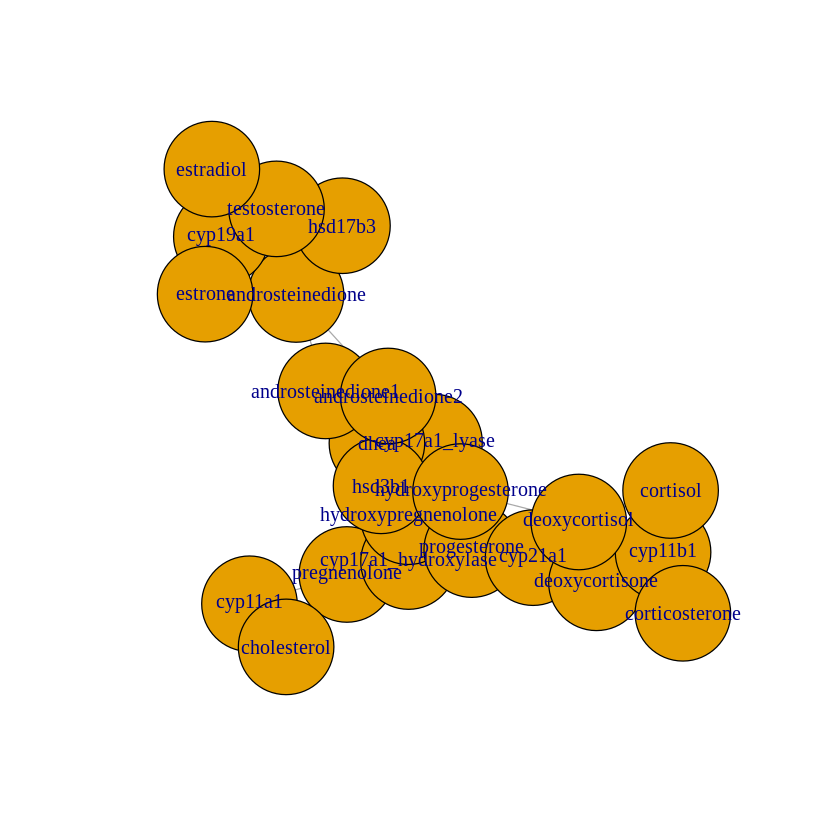

In [9]:
plot(bn_test)

Well, that's a grade A mess. There are a few ways to visualize this in other tools -- we're not going to get into those. The only decent way of visualizing larger networks is to use Cytoscape -- it's software that you'd have to install on your machine. It uses Java (and thus, a lot of places won't let you install it).

Next, we're going to run some test queries to see what it might predict.

The first test will assume there's no DHEA, no androsteinedione, and no testosterone. It will then generate probabilities that any of the hormones are present and the activation of the enzymes.

In [11]:
#Test Queries
querygrain(setEvidence(bn_test, evidence=list(dhea="no", androsteinedione = "no", testosterone="no")))

$cyp11a1
cyp11a1
      yes        no 
0.4675015 0.5324985 

$pregnenolone
pregnenolone
      yes        no 
0.6611392 0.3388608 

$cholesterol
cholesterol
       yes         no 
0.94313921 0.05686079 

$cyp17a1_hydroxylase
cyp17a1_hydroxylase
      yes        no 
0.3923505 0.6076495 

$hydroxypregnenolone
hydroxypregnenolone
      yes        no 
0.2239543 0.7760457 

$hsd3b1
hsd3b1
    yes      no 
0.49896 0.50104 

$progesterone
progesterone
      yes        no 
0.3320899 0.6679101 

$hydroxyprogesterone
hydroxyprogesterone
      yes        no 
0.1154431 0.8845569 

$cyp17a1_lyase
cyp17a1_lyase
      yes        no 
0.3863369 0.6136631 

$androsteinedione2
androsteinedione2
         yes           no 
0.0001737168 0.9998262832 

$androsteinedione1
androsteinedione1
         yes           no 
0.0001037394 0.9998962606 

$cyp21a1
cyp21a1
yes  no 
0.5 0.5 

$deoxycortisol
deoxycortisol
       yes         no 
0.06656712 0.93343288 

$deoxycortisone
deoxycortisone
     yes       no 
0.172724 0.827276 

$cyp11b1
cyp11b1
yes  no 
0.5 0.5 

$corticosterone
corticosterone
       yes         no 
0.09463477 0.90536523 

$cortisol
cortisol
       yes         no 
0.04261789 0.95738211 

$cyp19a1
cyp19a1
yes  no 
0.5 0.5 

$estrone
estrone
 yes   no 
0.01 0.99 

$hsd17b3
hsd17b3
yes  no 
0.5 0.5 

$estradiol
estradiol
 yes   no 
0.01 0.99

We'll run another test now. This test assumes we know we have cholesterol being produced and that we have pregnenolone being produced.

In [12]:
querygrain(setEvidence(bn_test, evidence=list(cholesterol="yes", pregnenolone="yes")))

$cyp11a1
cyp11a1
      yes        no 
0.6644295 0.3355705 

$cyp17a1_hydroxylase
cyp17a1_hydroxylase
yes  no 
0.5 0.5 

$hydroxypregnenolone
hydroxypregnenolone
yes  no 
0.5 0.5 

$hsd3b1
hsd3b1
yes  no 
0.5 0.5 

$progesterone
progesterone
yes  no 
0.5 0.5 

$hydroxyprogesterone
hydroxyprogesterone
  yes    no 
0.255 0.745 

$cyp17a1_lyase
cyp17a1_lyase
yes  no 
0.5 0.5 

$dhea
dhea
  yes    no 
0.255 0.745 

$androsteinedione2
androsteinedione2
    yes      no 
0.13495 0.86505 

$androsteinedione1
androsteinedione1
    yes      no 
0.13495 0.86505 

$androsteinedione
androsteinedione
      yes        no 
0.1588955 0.8411045 

$cyp21a1
cyp21a1
yes  no 
0.5 0.5 

$deoxycortisol
deoxycortisol
    yes      no 
0.13495 0.86505 

$deoxycortisone
deoxycortisone
  yes    no 
0.255 0.745 

$cyp11b1
cyp11b1
yes  no 
0.5 0.5 

$corticosterone
corticosterone
    yes      no 
0.13495 0.86505 

$cortisol
cortisol
      yes        no 
0.0761255 0.9238745 

$cyp19a1
cyp19a1
yes  no 
0.5 0.5 

$estrone
estrone
       yes         no 
0.08785878 0.91214122 

$testosterone
testosterone
       yes         no 
0.08785878 0.91214122 

$hsd17b3
hsd17b3
yes  no 
0.5 0.5 

$estradiol
estradiol
      yes        no 
0.0530508 0.9469492

So now, we're going to use some in vitro data from a high throughput steroidogenesis assay. All of the data are made up in these tests, to protect client data, but I use this model for various clients.

First, we'll look at Chemical X1 at a particular dose (it's a high dose that is not human relevant -- the human relevant dose didn't do anything).

In [14]:
format_results <- function(x){
  xdf <- data.frame(matrix(unlist(x), nrow=length(x), byrow=T))
  rownames(xdf) <- names(x)
  colnames(xdf) <- c("yes", "no")
  return(xdf)
}

cx1_results <- querygrain(setEvidence(bn_test, evidence=list(hydroxyprogesterone="no",
                                              androsteinedione="no", testosterone="no",
                                              estrone="no", deoxycortisone="yes",
                                              cortisol="no", deoxycortisol="no")))
cx1_results_out <- format_results(cx1_results)
write.table(cx1_results_out, file="cx1_results.txt", sep="\t", row.names=TRUE, col.names=NA)

Look at the above code. The last line saves the output data to a file if when we run it. Google saves these on the machine, and holds them in that File Folder icon to the left.

If you want to see what the results look like, click on the exported file.

Or you can just print the object's contents (see below).

In [16]:
cx1_results

$cyp11a1
cyp11a1
      yes        no 
0.6334142 0.3665858 

$pregnenolone
pregnenolone
       yes         no 
0.96419095 0.03580905 

$cholesterol
cholesterol
       yes         no 
0.97816523 0.02183477 

$cyp17a1_hydroxylase
cyp17a1_hydroxylase
       yes         no 
0.03786889 0.96213111 

$hydroxypregnenolone
hydroxypregnenolone
       yes         no 
0.02852647 0.97147353 

$hsd3b1
hsd3b1
       yes         no 
0.93546989 0.06453011 

$progesterone
progesterone
       yes         no 
0.93414319 0.06585681 

$cyp17a1_lyase
cyp17a1_lyase
      yes        no 
0.4954659 0.5045341 

$dhea
dhea
       yes         no 
0.01028286 0.98971714 

$androsteinedione2
androsteinedione2
         yes           no 
0.0001049372 0.9998950628 

$androsteinedione1
androsteinedione1
         yes           no 
0.0002947258 0.9997052742 

$cyp21a1
cyp21a1
       yes         no 
0.95773016 0.04226984 

$cyp11b1
cyp11b1
yes  no 
0.5 0.5 

$corticosterone
corticosterone
yes  no 
0.5 0.5 

$cyp19a1
cyp19a1
yes  no 
0.5 0.5 

$hsd17b3
hsd17b3
yes  no 
0.5 0.5 

$estradiol
estradiol
 yes   no 
0.01 0.99

Let's do another chemical. You can see that all we're really doing is translating from the steroidogenesis assay's output. Was this hormone increased (which is a TRUE/YES), or is it decreased (which is a FALSE/NO), or did it not change -- in which case we really don't tell it anything.

In [17]:
cx2_results <- querygrain(setEvidence(bn_test, evidence=list(progesterone="yes", hydroxyprogesterone="yes",
                                              cortisol="no", deoxycortisol="no",
                                              androsteinedione="no", testosterone="no",
                                              estrone="no")))
cx2_results_out <- format_results(cx2_results)
write.table(cx2_results_out, file="cx2_results.txt", sep="\t", row.names=TRUE, col.names=NA)

# Test Questions

Question 1: What enzyme is being inhibited that would yield these results?

1.   Testosterone is not detected
2.   Estrogen is not detected
3.   Estrone is not detedcted
4.   Hydroxypregnenolone is not detected

Question 2: What enzyme is being activated if everything is being shunted to corticosterone production and the following were true:

1.   Testosterone is not detected
2.   Estrogen is not detected
3.   Progesterone is not detected

Question 3: Hypothesize what will happen if you somehow inhibited HSD3B1. Test your hypothesis by writing some code to simulate this situation.